<a href="https://colab.research.google.com/github/ravina029/Deep-Learning/blob/main/Cat_V_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout



In [ ]:
import os
#counting the number of files in training data file
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print("the number of images in the training files are:", file_count)


the number of images in the training files are: 0


In [ ]:
file_name=os.listdir('/content/train/cats/')
print(file_name)

['cat.11428.jpg', 'cat.8672.jpg', 'cat.3083.jpg', 'cat.8914.jpg', 'cat.5792.jpg', 'cat.9975.jpg', 'cat.7675.jpg', 'cat.145.jpg', 'cat.2055.jpg', 'cat.12446.jpg', 'cat.7870.jpg', 'cat.9743.jpg', 'cat.8067.jpg', 'cat.8456.jpg', 'cat.2391.jpg', 'cat.3500.jpg', 'cat.3043.jpg', 'cat.10436.jpg', 'cat.3262.jpg', 'cat.11503.jpg', 'cat.11814.jpg', 'cat.3468.jpg', 'cat.360.jpg', 'cat.7079.jpg', 'cat.1793.jpg', 'cat.11095.jpg', 'cat.531.jpg', 'cat.1138.jpg', 'cat.5095.jpg', 'cat.10794.jpg', 'cat.2298.jpg', 'cat.11723.jpg', 'cat.5289.jpg', 'cat.484.jpg', 'cat.11158.jpg', 'cat.7877.jpg', 'cat.7055.jpg', 'cat.7108.jpg', 'cat.7386.jpg', 'cat.8488.jpg', 'cat.7327.jpg', 'cat.6827.jpg', 'cat.7455.jpg', 'cat.8649.jpg', 'cat.2862.jpg', 'cat.1445.jpg', 'cat.3720.jpg', 'cat.7584.jpg', 'cat.175.jpg', 'cat.2396.jpg', 'cat.10529.jpg', 'cat.9649.jpg', 'cat.843.jpg', 'cat.1819.jpg', 'cat.1409.jpg', 'cat.3409.jpg', 'cat.606.jpg', 'cat.4846.jpg', 'cat.6034.jpg', 'cat.3344.jpg', 'cat.2850.jpg', 'cat.12318.jpg', 'ca

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


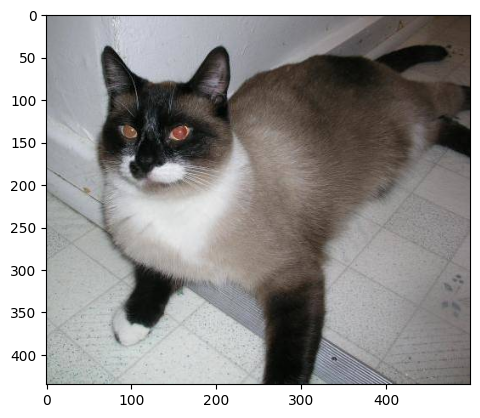

In [ ]:
#display cat image
img=mpimg.imread('/content/train/cats/cat.3083.jpg')
plt.imshow(img) #similarlywe can disply the image of dog also


**genearators:**

will devide the big data in small small batches,and then load one batch at a time, once the work of one batch is done that's get replaced with the new one. which saves lot of RAM space/

In [ ]:
#let's work with generator
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(256, 256),
    shuffle=True,)


validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(256, 256),
    shuffle=True,)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#create a directorry for the resized images
#os.makedirs('/content/image_resized')

In [ ]:
#original_folder="/content/train"
#resized_folder="/content/image_resized"



In [ ]:
def process(image,label):
  image=tf.cast(image/255 ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [ ]:
#create a CNN model

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:
history=model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
313/313 [==============================] - 71s 204ms/step - loss: 1.4813 - accuracy: 0.5875 - val_loss: 1.2253 - val_accuracy: 0.4858
Epoch 2/10
313/313 [==============================] - 66s 208ms/step - loss: 0.6027 - accuracy: 0.6794 - val_loss: 0.5846 - val_accuracy: 0.6928
Epoch 3/10
313/313 [==============================] - 63s 201ms/step - loss: 0.5269 - accuracy: 0.7357 - val_loss: 3.3430 - val_accuracy: 0.5542
Epoch 4/10
313/313 [==============================] - 63s 201ms/step - loss: 0.4598 - accuracy: 0.7871 - val_loss: 0.8861 - val_accuracy: 0.6342
Epoch 5/10
313/313 [==============================] - 62s 197ms/step - loss: 0.3923 - accuracy: 0.8232 - val_loss: 0.4168 - val_accuracy: 0.8112
Epoch 6/10
313/313 [==============================] - 65s 204ms/step - loss: 0.3178 - accuracy: 0.8605 - val_loss: 0.4614 - val_accuracy: 0.7836
Epoch 7/10
313/313 [==============================] - 63s 200ms/step - loss: 0.2635 - accuracy: 0.8885 - val_loss: 1.1385 - val_ac

In [ ]:
import matplotlib.pyplot as plt


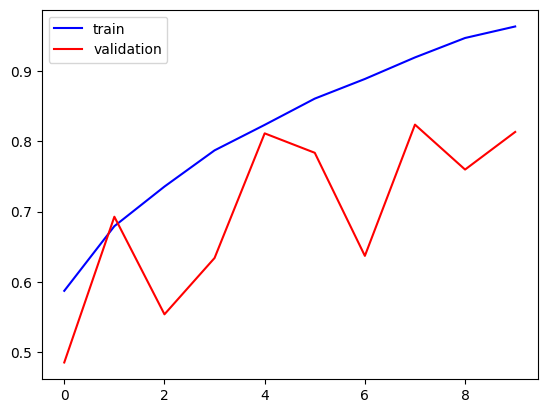

In [ ]:
plt.plot(history.history['accuracy'],color="blue",label="train")
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.show()

It is clear fro the graph that this is a case of overfitting,with the increase of epochs training accuracy incraeses but validation accuracy deccreases.

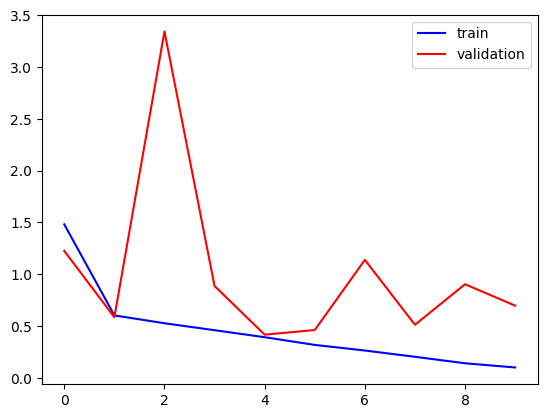

In [ ]:
plt.plot(history.history['loss'],color="blue",label="train")
plt.plot(history.history['val_loss'],color='red',label='validation')
plt.legend()
plt.show()

Obsevation: It is clear fro the graph that this is a case of overfitting,with the increase of epochs training error decreases but validation error incraeses.

In [ ]:
import cv2

In [ ]:
test_image=cv2.imread('/content/doggi.jpeg')
#for doggi.jpeg it predicted dog as cat, but for labrador.jpeg it predicted correctly

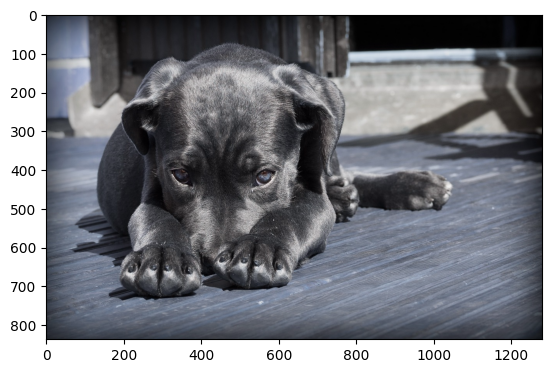

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(837, 1280, 3)

In [ ]:
test_image=cv2.resize(test_image,(256,256))

In [ ]:
test_input=test_image.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 109ms/step


array([[1.]], dtype=float32)

In [ ]:
test_image2=cv2.imread('/content/cat.jpeg')

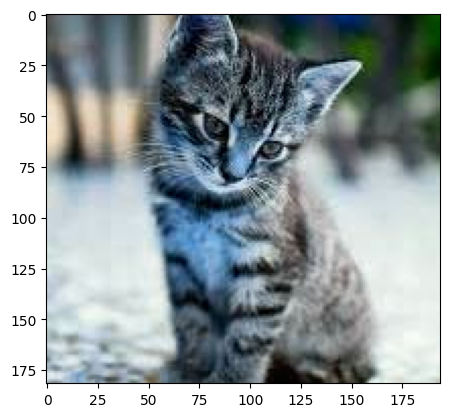

In [ ]:
plt.imshow(test_image2)

In [ ]:
test_image2.shape

(182, 194, 3)

In [ ]:
test_image2=cv2.resize(test_image2,(256,256))

In [ ]:
test_input2=test_image2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input2)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)